<table>
 <tr align=left><td><img align=left src="./images/CC-BY.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Kyle T. Mandli</td>
</table>

In [1]:
from __future__ import print_function

# Plotting with `matplotlib`

The most common facility for plotting with the Python numerical suite is to use the `matplotlib` package.  We will cover a few of the basic approaches to plotting figures.  If you are interested in learning more about `matplotlib` or are looking to see how you might create a particular plot check out the matplotlib [gallery](https://matplotlib.org/stable/gallery/index.html) for inspiration.

Please see the [matplotlib](https://matplotlib.org) site for more details, [examples](https://matplotlib.org/gallery/index.html) and [tutorials](https://matplotlib.org/tutorials/index.html).

## Interfaces

There are two primary ways to interface with the plotting facilities in `matplotlib`
 - Influenced by `MATLAB`, a procedural interface and
 - An object oriented interface

In [2]:
import numpy
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook


These commands import the necessary functions for NumPy and `matplotlib` for our demos. 

The "magic" `%matplotlib inline` command make our plots display directly in the notebook.

### Matlab Inspired Interface
First off, lets plot a simple quadratic function $f(x) = x^2 + 2x + 3$:

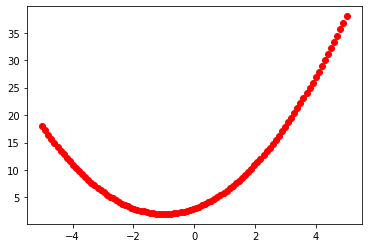

In [3]:
x = numpy.linspace(-5, 5, 100)
#print(x)
y = x**2 + 2 * x + 3
#print(y)
plt.plot(x, y, 'ro')
# plt.plot?
plt.show()

We can also label our plot (please do this), set the bounds and change the style of the plot:

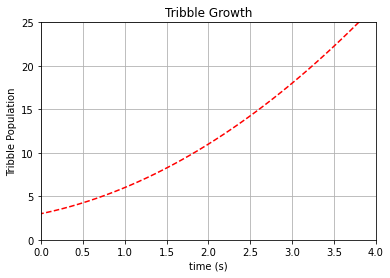

In [4]:
plt.plot(x, y, 'r--')
plt.xlabel("time (s)")
plt.ylabel("Tribble Population")
plt.title("Tribble Growth")
plt.xlim([0, 4])
plt.ylim([0, 25])
plt.grid()
plt.show()

It is possible to include the graph of more than one relationship. Simply use additional plot commands for each relationship you wish to graph. When doing so it is polite to include a legend. 

More information about using the [legend command](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html) is available at the matplotlib website.

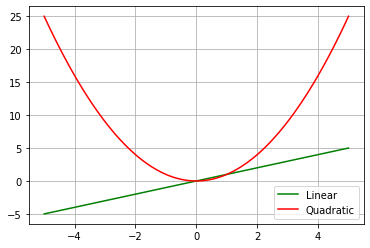

In [8]:
y1 = x
plt.plot(x,x,'g',label='Linear')
plt.plot(x,x*x,'r',label='Quadratic')
plt.legend(loc='best')
plt.grid()
plt.show()

The other major way to plot data is via a pseudo-color plot.  A pseudo-color plot takes 3-dimensional data (or 2-dimensional depending on how you look at it) and plots it using color to represent the values of the function.  Say we have a function $f(x, y)$, we can plot a pseudo-color by using the following commands.

In [9]:
# Set up the numpy arrays
x = numpy.linspace(-1, 1, 100)
y = numpy.linspace(-1, 1, 100)
X, Y = numpy.meshgrid(x, y)
pi = numpy.pi
F = numpy.sin(3*pi*X)*numpy.cos(2*pi*Y)

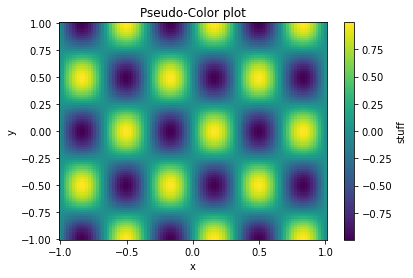

In [11]:
# make a pseudocolor plot
plt.pcolor(X,Y,F,shading='auto')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label="stuff")
#plt.axis('square')
plt.title('Pseudo-Color plot')
plt.show()

instead of pcolor,  you could also make a filled contour plot using contourf

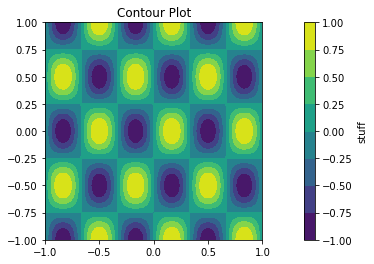

In [14]:
plt.contourf(X, Y, F)
plt.colorbar(label="stuff")
plt.title('Contour Plot')
plt.axis('square')
plt.show()

Here we have used a new way to create NumPy `ndarray`s so that we can easily evaluate 2-dimensional functions.  The function `meshgrid` takes two 1-dimensional arrays and turns them into 2, 2-dimensional arrays whose matching indices will provide an easy to use set of arrays that can be evaluate 2-dimensional functions.

In the current version of Matplotlib (v3.x), the default colormap is 'viridis' while earlier versions used a rainbow colormap known as 'jet'.  I highly suggest looking at [this explanation of how to choose a colormap](https://matplotlib.org/stable/tutorials/colors/colormaps.html) if you are interested.  

Anyway, let us make this plot also more useful.

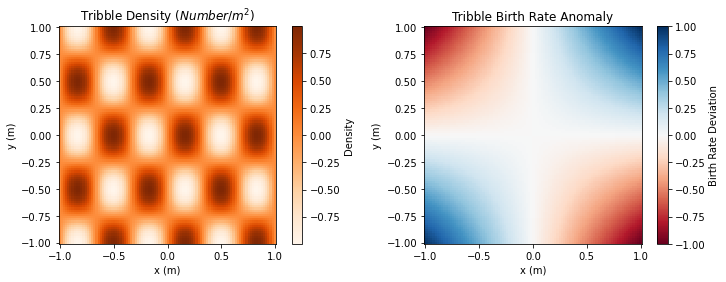

In [15]:
color_map = plt.get_cmap("Oranges")
plt.gcf().set_figwidth(plt.gcf().get_figwidth() * 2) 
plt.subplot(1, 2, 1, aspect="equal")
plt.pcolor(X, Y, F, cmap=color_map, shading='auto')
plt.colorbar(label="Density")

plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Tribble Density ($Number/m^2$)")

plt.subplot(1, 2, 2, aspect="equal")
plt.pcolor(X, Y, X*Y, cmap=plt.get_cmap("RdBu"),shading='auto')
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Tribble Birth Rate Anomaly")
plt.colorbar(label="Birth Rate Deviation")

plt.autoscale(enable=True, tight=False)
plt.show()

## Object-Oriented Interface

A better way to "build" plots is to use a more object-oriented approach.  In this case, we create the objects and manipulate them which allows us to have more control over how we create plots.  Here we will create the annotated plots so that we have examples on how to do the same things (notice that they are very similar).  The basic premise of this approach is that you generate objects that can be manipulated and remain persistent.

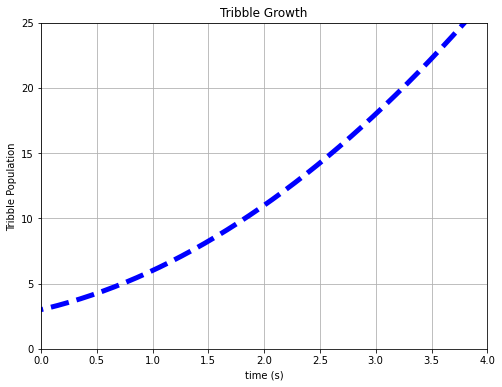

In [18]:
x = numpy.linspace(-5, 5, 100)
y = x**2 + 2 * x + 3

fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1, 1, 1)
growth_curve = axes.plot(x, y, 'r--')
axes.set_xlabel("time (s)")
axes.set_ylabel("Tribble Population")
axes.set_title("Tribble Growth")
axes.set_xlim([0, 4])
axes.set_ylim([0, 25])
axes.grid()
growth_curve[0].set_color('b')
growth_curve[0].set_linewidth(5)
plt.show()

Here is the other example with a few extra tricks added in.

In [19]:
x = numpy.linspace(-1, 1, 100)
y = numpy.linspace(-1, 1, 100)
X, Y = numpy.meshgrid(x, y)
F = numpy.sin(3*pi*X)*numpy.cos(2*pi*Y)

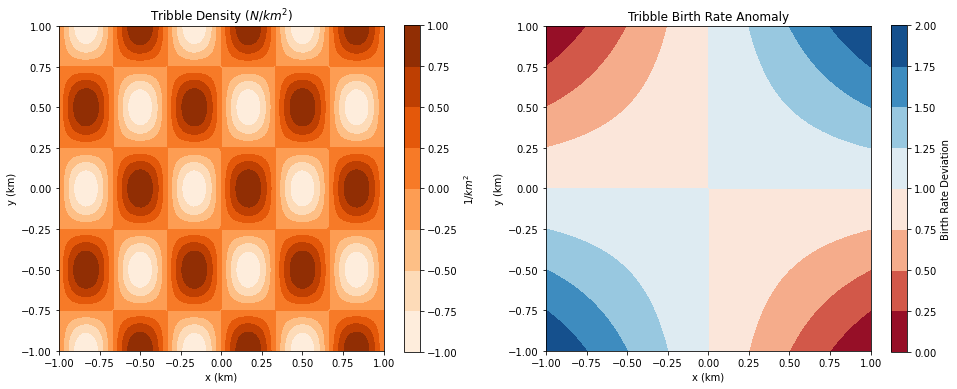

In [20]:
fig = plt.figure(figsize=(8,6))
fig.set_figwidth(fig.get_figwidth() * 2)
fig.

axes = fig.add_subplot(1, 2, 1, aspect='equal')
tribble_density = axes.contourf(X, Y, F, cmap=plt.get_cmap("Oranges"))
axes.set_xlabel("x (km)")
axes.set_ylabel("y (km)")
axes.set_title("Tribble Density ($N/km^2$)")
cbar = fig.colorbar(tribble_density, ax=axes)
cbar.set_label("$1/km^2$")

axes = fig.add_subplot(1, 2, 2, aspect='equal')
klingon_population_density = axes.contourf(X, Y, X * Y + 1, cmap=plt.get_cmap("RdBu"))
axes.set_xlabel("x (km)")
axes.set_ylabel("y (km)")
axes.set_title("Tribble Birth Rate Anomaly")
cbar = fig.colorbar(klingon_population_density, ax=axes)
cbar.set_label("Birth Rate Deviation")

plt.show()

Make sure to visit ([matplotlib.org](https://matplotlib.org/)) for all sorts of other hints, tricks, and documentation.

### Time for HW1